# DATA PRE-PROCESSING

In this file, we will explain how the data will be pre-processed to be used later for the Neural Network.

## Data

The data used has been extracted from Kaggle. These data represent house prices in relation to various features, such as the number of square feet, number of rooms, year of construction, etc.  
The main idea is that from these input variables, the neural network can predict the value (price) of the house corresponding to the output variable.

- The dataset used is available [here](https://www.kaggle.com/datasets/shree1992/housedata/data).

## Import Libraries / Download the Data

First, we will import the libraries that we will use throughout this project. Then, we will download the dataset [House price prediction](https://www.kaggle.com/datasets/shree1992/housedata/data) mentioned earlier.  
This dataset consists of three files:
- output.csv
- data.csv (the one we will use)
- data.dat

All three files will be downloaded into a predefined directory, which will be saved in the variable `path` to access the data files later.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import plotly.express as px
import seaborn as sns
import os

# Download the dataset
path = kagglehub.dataset_download("shree1992/housedata")

First, we will read the downloaded data stored in the directory referenced by the variable `path`. Then, we will display the first 5 rows of the DataFrame and the last 5 rows.

In [4]:
df = pd.read_csv(f'{path}/data.csv')
pd.set_option('display.max_columns', None)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## Initial Observations of the Data

Before modifying the data, we need to observe it to understand and make informed decisions.

First, we will display the basic information about the data using the pandas `.info()` method.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

As we can see, this gives us a list of the different variables in the data, along with the count of null values and the type of each variable. At first glance, it appears that this dataset has no null values; however, we will further analyze the DataFrame later to confirm this. Regarding the variable types, we will classify them into categorical, numerical, textual, or complex variables.

In [6]:
numerical = [col for col in df.columns if df[col].dtype == 'float64' or df[col].dtype == 'int64']
others_type = [col for col in df.columns if df[col].dtype == 'object']

print(f"Numerical Variables: {numerical}")
print(f"Categorical, Textual and Complex Variables: {others_type}")

Numerical Variables: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical, Textual and Complex Variables: ['date', 'street', 'city', 'statezip', 'country']


| **VARIABLE** | date    | price     | bedrooms  | bathrooms | sqft_living | sqft_lot  | floors    | waterfront | view      | condition | sqft_above | sqft_basement | yr_build  | yr_renovated | 
|--------------|---------|-----------|-----------|-----------|-------------|-----------|-----------|------------|-----------|-----------|------------|---------------|-----------|--------------|
| **TYPE**     | complex | numerical | numerical | numerical | numerical   | numerical | numerical | numerical  | numerical | numerical | numerical  | numerical     | numerical | numerical    |


| **VARIABLE** | street  | city    | statezip | country     |
|--------------|---------|---------|----------|-------------|
| **TYPE**     | textual | textual | textual  | categorical |


The table above clearly shows the types of variables in the data.

Now that we have classified the variable types, we will check the number of null values for each variable.


In [7]:
null_values = df.isnull().sum()

print(f"Null Values: \n{null_values}")

Null Values: 
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Once again, we confirm that this dataset contains no null values, which simplifies our data pre-processing work.

Next, we will check if there are duplicate patterns in the data.

In [8]:
duplicated = df.duplicated().sum()

print(f"Duplicated Rows: {duplicated}")

Duplicated Rows: 0


As observed, there are no duplicate patterns in this dataset.

## Analyze the Data

In this section, we will analyze the data to perform the necessary pre-processing.

The steps we will follow are as follows:
1. Determine if any column can be removed because it does not provide necessary information for prediction.
2. Detect outliers in the various columns.
3. Remove the outliers.
4. Transform categorical variables into numerical ones.

First, we will begin by observing the basic information of the data using the pandas `.describe()` method.


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000



As we can see, some variables already show the presence of outliers. This can be observed by comparing the mean and the maximum value of a variable.  
For example, for the `price` variable, we can see that the mean is `5.519630e+05`, while the maximum value is `2.659000e+07`. In this case, it is evident that the value `2.659000e+07` is likely an outlier since the mean is much lower (considering the sensitivity of the mean to outliers).

Another observation is that the `price` variable contains values of `0`, which are not relevant for us.

### Elimination of "Irrelevant" Columns

In this section, we will determine which columns may be irrelevant for predicting house prices. We will start by analyzing the non-numeric columns.


In [10]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [11]:
df['street'].value_counts()

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11716 16th Ave NE        2
35229 SE Terrace St      2
13800 453rd Ave SE       2
                        ..
501 N 143rd St           1
14855 SE 10th Pl         1
759 Ilwaco Pl NE         1
5148 S Creston St        1
10915 243rd Ave NE       1
Name: count, Length: 4525, dtype: int64

In [12]:
df['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [13]:
df['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

From the results of the two previous cells, we observe two interesting cases.

First, the `country` column always has the same value, so we can remove it since it does not provide additional information.

Second, the `street` column has many unique values, and since it is a textual data type, transforming it into a numeric type with so many values is complex. Therefore, we decide to remove it.

Additionally, the `date` column does not seem to be related to house attributes, so it does not help predict the house price, and we will also remove it.

Finally, we will also remove the `view` and `waterfront` columns since they do not provide very relevant information.

**Thus, we have decided to remove the following columns:**
- **country**
- **street**
- **date**
- **statezip**
- **view**
- **waterfront**

Next, we will remove the columns mentioned earlier to continue analyzing the data.

In [14]:
df1 = df.drop(['country', 'street', 'statezip', 'date', 'view', 'waterfront'], axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,Redmond


### Detect Outliers

One way to detect outliers is by visualizing the data, as outliers can often be identified in various plots.


In [15]:
fig = px.histogram(df1, x='price', title='Price Distribution')
fig.show()

In the above plot, we can clearly see the presence of outliers in the `price` attribute, as the values are mostly concentrated on the left side of the plot.


In [16]:
fig = px.scatter(df1, x='sqft_living', y='price', title='Price vs Sqft Living')
fig.show()

Before removing the outliers, we will eliminate `price` values that are 0.


In [17]:
df2 = df1[df1['price']!=0]
df2.shape

(4551, 12)

Performing the same process but this time showing the `price` attribute along with `sqft_living`, we can see the presence of outliers, which we must remove.

To determine which values are outliers, we will use a well-known method called the "IQR Method." This method creates a barrier using the data's quartiles. Values outside the first quartile (`Q1`) and third quartile (`Q3`) are considered outliers.


In [18]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = find_outliers_IQR(df2['price'])
print("Number of Outliers: "+ str(len(outliers)))
print("Max Value Outlier: "+ str(outliers.max()))
print("Min Value Outlier: "+ str(outliers.min()))

Number of Outliers: 240
Max Value Outlier: 26590000.0
Min Value Outlier: 1157200.0


We will proceed to remove the outliers in `price`.

In [19]:
df3 = df2.drop(outliers.index)
df3.shape

(4311, 12)

If we now display the data again, we will notice a significant difference, with values distributed more uniformly.

In [20]:
fig = px.histogram(df3, x='price', title='Price Distribution')
fig.show()

In [21]:
fig = px.scatter(df3, x='sqft_living', y='price', title='Price vs Sqft Living')
fig.show()

Although we removed the outliers from `price`, we can still see outliers in the `sqft_living` values. We will remove them using the same method applied to the `price` data.

In [22]:
outliers = find_outliers_IQR(df3['sqft_living'])
print("Number of Outliers: "+ str(len(outliers)))
print("Max Value Outlier: "+ str(outliers.max()))
print("Min Value Outlier: "+ str(outliers.min()))

Number of Outliers: 73
Max Value Outlier: 7320
Min Value Outlier: 4140


In [23]:
df4 = df3.drop(outliers.index)
df4.shape

(4238, 12)

If we display the `price` data with respect to `sqft_living` again, we can see that there no longer appear to be outliers.

In [24]:
fig = px.scatter(df4, x='sqft_living', y='price', title='Price vs Sqft Living')
fig.show()

## Showing All the Attributes

Next, we will display the distribution of attributes individually and in relation to other attributes.

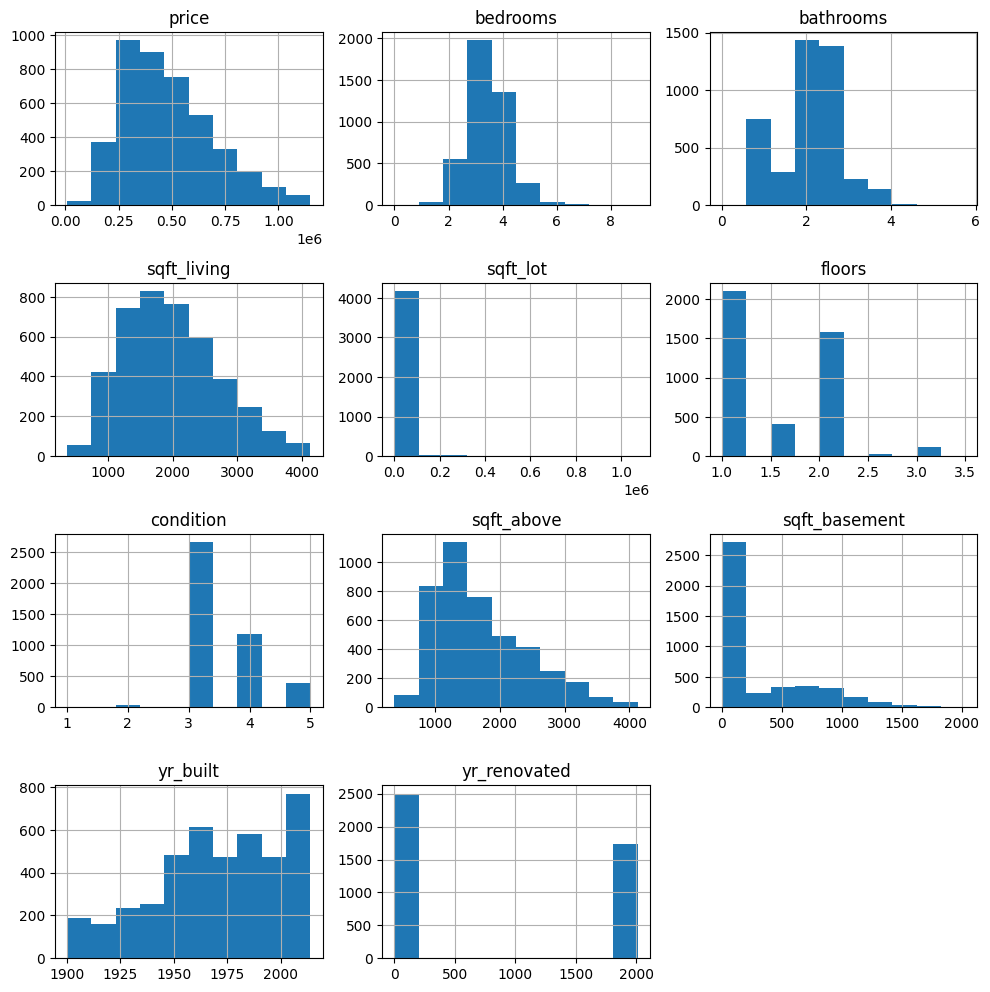

In [25]:
df4.hist(figsize=(10, 10))
plt.tight_layout(pad=1.0) 
plt.show()

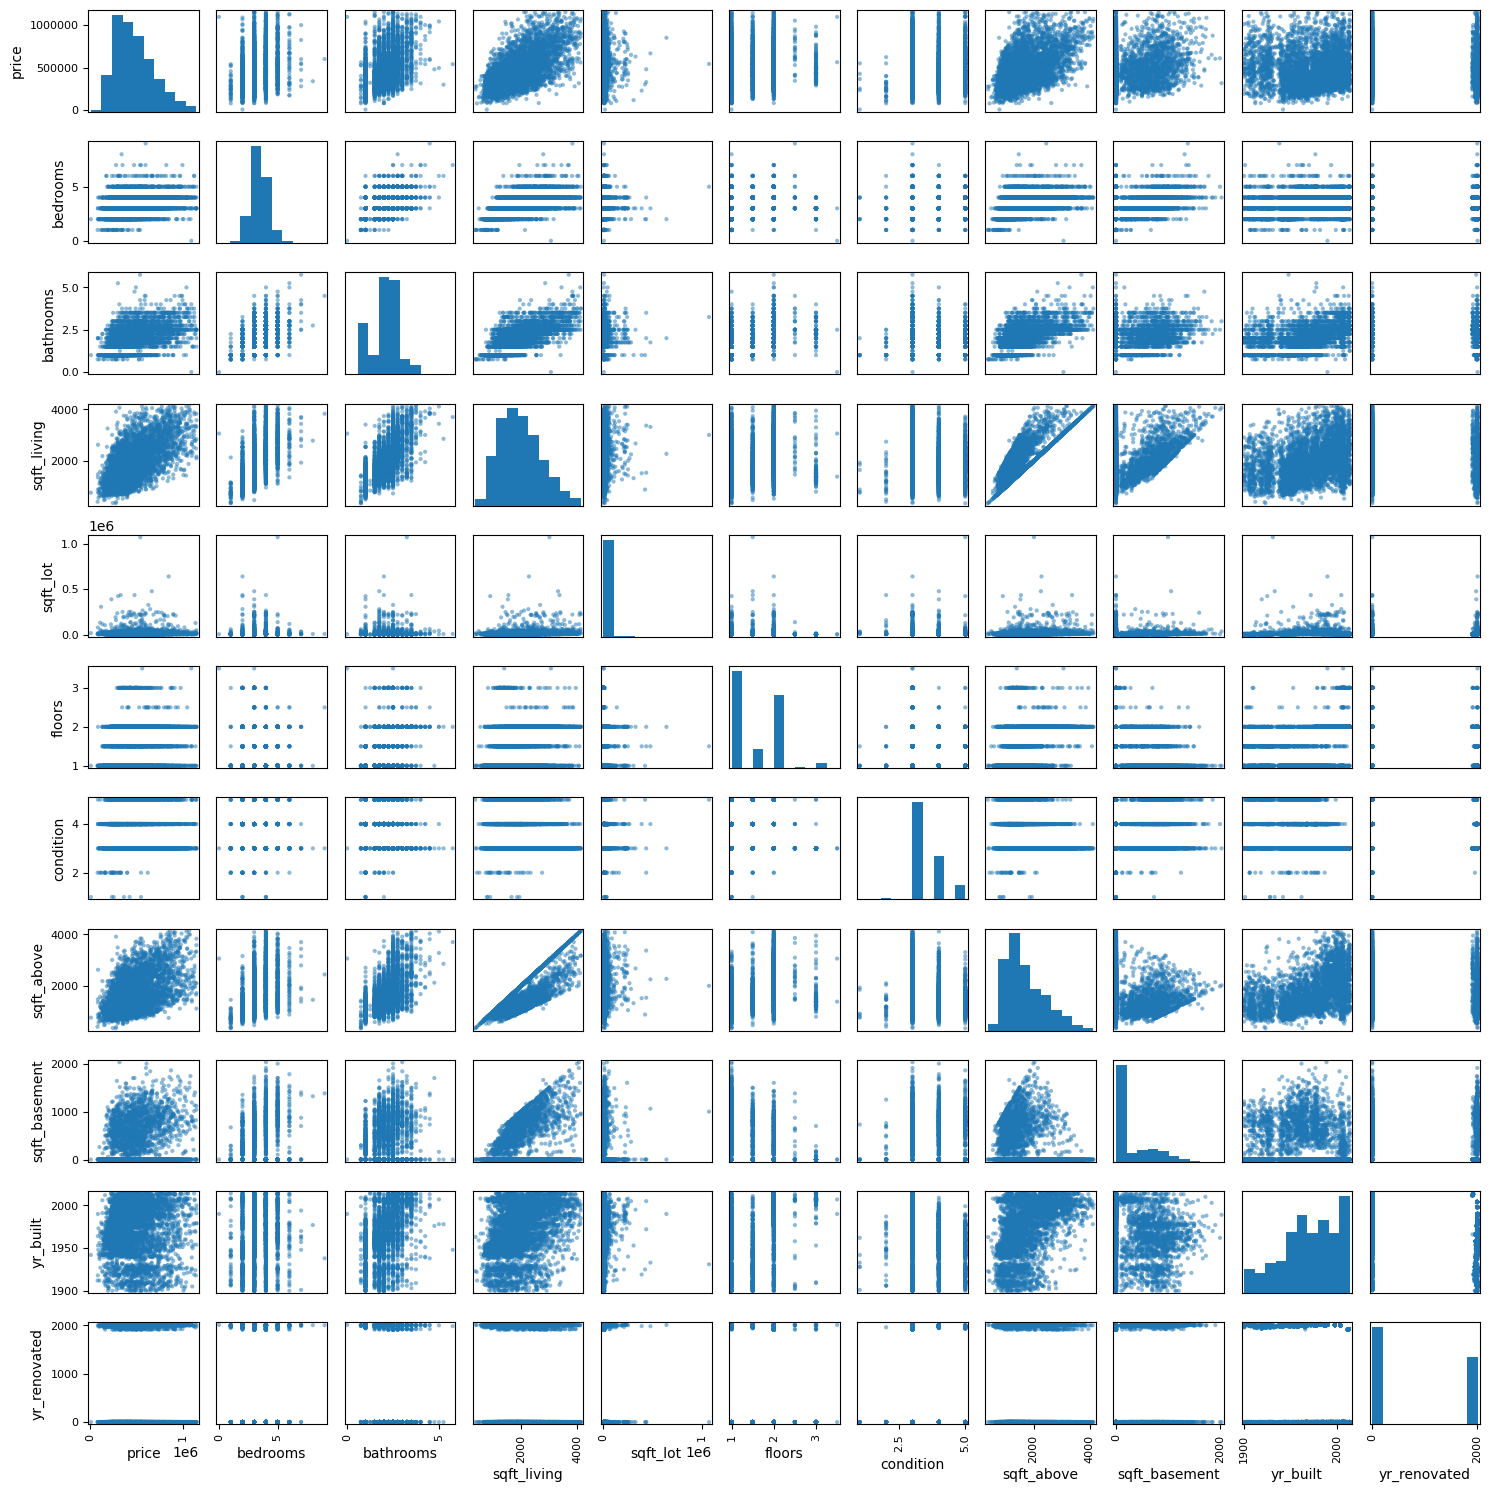

In [26]:
pd.plotting.scatter_matrix(df4, figsize=(15, 15))
plt.tight_layout(pad=1.0)
plt.show()

In [27]:
df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,3,1340,0,1955,2005,Shoreline
2,342000.0,3.0,2.00,1930,11947,1.0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,4,1140,800,1976,1992,Redmond
5,490000.0,2.0,1.00,880,6380,1.0,3,880,0,1938,1994,Seattle


## Feature Engineering

Since the data seems quite clean, we will create some new attributes from the existing ones. These attributes will provide relevant information that may help models predict house prices more accurately.

Various attributes can be created, but I opted to create the following:
- `property_age` - indicates the age of a property.
- `effective_age` - the years since the property was renovated or built.
- `price_per_sqft` - indicates the price per square foot of the property. This attribute may help in predicting house prices.


In [28]:
df4['property_age'] = 2024 - df4['yr_built']
df4['effective_age'] = 2024 - np.where(df4['yr_renovated'] > 0, df4['yr_renovated'], df4['yr_built'])
df4['price_per_sqft'] = df4['price'] / df4['sqft_living']

## Data Scaling

Finally, I will apply scaling to all numeric attributes. This scaling will ensure that variable values are between 0 and 1. Performing this scaling is beneficial since models like neural networks tend to perform better with small values.

In [29]:
def min_max_scaling(column, min_value=None, max_value=None):
    if min_value is None:
        min_value = column.min()
    if max_value is None:
        max_value = column.max()
    return (column - min_value) / (max_value - min_value)


min_max_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'property_age', 'effective_age', 'price_per_sqft', 'price']

for col in min_max_col:
    df4[col] = min_max_scaling(df4[col])

df4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,property_age,effective_age,price_per_sqft
0,0.267204,0.333333,0.260870,0.257979,0.006775,0.2,3,0.257979,0.000000,0.482456,0.995531,Shoreline,0.517544,0.078947,0.303802
2,0.292593,0.333333,0.347826,0.414894,0.010534,0.0,4,0.414894,0.000000,0.578947,0.000000,Kent,0.421053,0.421053,0.227193
3,0.360883,0.333333,0.391304,0.433511,0.006885,0.0,4,0.167553,0.492611,0.552632,0.000000,Bellevue,0.447368,0.447368,0.271759
4,0.474698,0.444444,0.434783,0.417553,0.009186,0.0,4,0.204787,0.394089,0.666667,0.989076,Redmond,0.333333,0.192982,0.371638
5,0.422168,0.222222,0.173913,0.135638,0.005348,0.0,3,0.135638,0.000000,0.333333,0.990070,Seattle,0.666667,0.175439,0.743014


## Categorical to Numerical

The last important step is converting the categorical variable into a numerical one. To perform this conversion, I will use the `target encoding` method, as I believe it is the most appropriate. This method calculates the mean of the values corresponding to a particular category. In our case, it calculates the mean house prices for a given city and replaces the city with this mean. This method is highly recommended in situations like ours, where the location of a house likely has a strong relationship with its price.
 

In [30]:
city_target_mean = df4.groupby('city')['price'].mean()
df4['city_encoded'] = df4['city'].map(city_target_mean)

df4.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,property_age,effective_age,price_per_sqft,city_encoded
0,0.267204,0.333333,0.260870,0.257979,0.006775,0.2,3,0.257979,0.000000,0.482456,0.995531,Shoreline,0.517544,0.078947,0.303802,0.337268
2,0.292593,0.333333,0.347826,0.414894,0.010534,0.0,4,0.414894,0.000000,0.578947,0.000000,Kent,0.421053,0.421053,0.227193,0.254942
3,0.360883,0.333333,0.391304,0.433511,0.006885,0.0,4,0.167553,0.492611,0.552632,0.000000,Bellevue,0.447368,0.447368,0.271759,0.587197
4,0.474698,0.444444,0.434783,0.417553,0.009186,0.0,4,0.204787,0.394089,0.666667,0.989076,Redmond,0.333333,0.192982,0.371638,0.545022
5,0.422168,0.222222,0.173913,0.135638,0.005348,0.0,3,0.135638,0.000000,0.333333,0.990070,Seattle,0.666667,0.175439,0.743014,0.438701


We will remove the original `city` column since we have transformed its values into those found in `city_encoded`.


In [31]:
df5 = df4.drop(columns=['city'])

df5.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,property_age,effective_age,price_per_sqft,city_encoded
0,0.267204,0.333333,0.260870,0.257979,0.006775,0.2,3,0.257979,0.000000,0.482456,0.995531,0.517544,0.078947,0.303802,0.337268
2,0.292593,0.333333,0.347826,0.414894,0.010534,0.0,4,0.414894,0.000000,0.578947,0.000000,0.421053,0.421053,0.227193,0.254942
3,0.360883,0.333333,0.391304,0.433511,0.006885,0.0,4,0.167553,0.492611,0.552632,0.000000,0.447368,0.447368,0.271759,0.587197
4,0.474698,0.444444,0.434783,0.417553,0.009186,0.0,4,0.204787,0.394089,0.666667,0.989076,0.333333,0.192982,0.371638,0.545022
5,0.422168,0.222222,0.173913,0.135638,0.005348,0.0,3,0.135638,0.000000,0.333333,0.990070,0.666667,0.175439,0.743014,0.438701


## Data Correlation

Finally, I will display the data correlation. A correlation close to 0 indicates that the data is not correlated, while a correlation close to 1 indicates a positive correlation. If the correlation is close to -1, it indicates a negative correlation.

As observed, the attributes most correlated with price are `sqft_living`, `bathrooms`, `sqft_above`, `price_per_sqft`, and `city_encoded`. This suggests that these attributes provide more information for predicting house prices.


<Axes: >

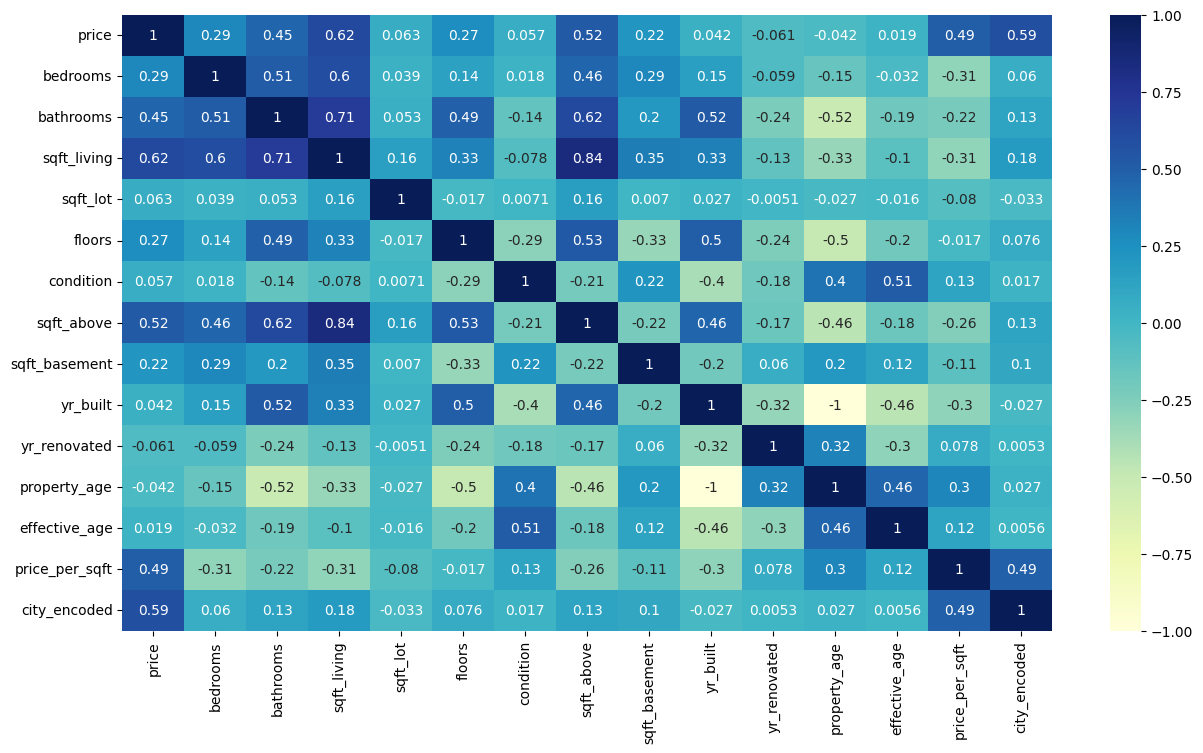

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(df5.select_dtypes('number').corr(), annot=True, cmap="YlGnBu")

# Save the Data

Finally, we will save the processed data into `csv` files for later access using various models.

In this case, I will save all processed data in its original order into a file named `processed_data.csv` in case it is needed in this format (without being split into training and test sets).

Finally, I will shuffle the data to remove any linearity or ordering that might be present. After that, I will split the data into 80% for training and 20% for testing.

In [33]:
df5.to_csv('./data/processed_data.csv', index=False)

In [34]:
df5_shuffled = df5.sample(frac=1, random_state=42).reset_index(drop=True)

X = df5_shuffled.drop(columns=['price'])
y = df5_shuffled['price']

train_size = int(len(df5_shuffled) * 0.8)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]


X_train.to_csv('./data/X_train.csv', index=False)
y_train.to_csv('./data/y_train.csv', index=False)
X_test.to_csv('./data/X_test.csv', index=False)
y_test.to_csv('./data/y_test.csv', index=False)
